In [1]:
import time
import random
import math
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Problem - Flight Scheduling
> #### A group of people are planning a meeting

> #### Each individual lives in a different city and they are agreed to meet at a specific city ,say X

> #### Each individual takes a direct flight from their city to the location X

> #### We want to find a schedule which will minimize the cost of travel and time spend waiting for others 


### Lets look at an example of arrival at target location

* person from london arrive early so he has to wait the most 
* person from dublin arrive the last so he wait the least

![caption](images/arrival.png)


### Let's look at an example of departure from target location to home
* person from paris has to wait for 12hrs because his flight was scheduled at 8pm
* person from london does not have to wait because his flight was scheduled at 8am

![](images/departure.png)

## People

In [2]:
# people contains a list of tuples with city and name-of-airport (code of airport in the city)

# lets say there are six people from different location planning to meet at a location in rome 


people = [('Lisbon', 'LIS'),
          ('Madrid', 'MAD'),
          ('Paris', 'CDG'),
          ('Dublin', 'DUB'),
          ('Brussels', 'BRU'),
          ('London', 'LHR')]

## Set a destination

Rome–Fiumicino International Airport "Leonardo da Vinci" is an international airport in Rome and the major airport in Italy. It is one of the busiest airports in Europe by passenger traffic with over 43.5 million passengers served in 2019.

Rome–Fiumicino International Airport "Leonardo da Vinci" ( IATA: FCO, ICAO: LIRF) 

In [3]:
destination = 'FCO'

## Flights data

data format `from` `to` `departure` `arriva` `cost`

In [4]:
# let take a look at fligts data

for line in open('flight data/flights.txt'):
    print(line)

FCO,LIS,6:19,8:13,239

LIS,FCO,6:11,8:31,249

FCO,LIS,8:04,10:59,136

LIS,FCO,7:39,10:24,219

FCO,LIS,9:31,11:43,210

LIS,FCO,9:15,12:03,99

FCO,LIS,11:07,13:24,171

LIS,FCO,11:08,13:07,175

FCO,LIS,12:31,14:02,234

LIS,FCO,12:18,14:56,172

FCO,LIS,14:05,15:47,226

LIS,FCO,13:37,15:08,250

FCO,LIS,15:07,17:21,129

LIS,FCO,15:03,16:42,135

FCO,LIS,16:35,18:56,144

LIS,FCO,16:51,19:09,147

FCO,LIS,18:25,20:34,205

LIS,FCO,18:12,20:17,242

FCO,LIS,20:05,21:44,172

LIS,FCO,20:05,22:06,261

FCO,MAD,6:03,8:43,219

MAD,FCO,6:05,8:32,174

FCO,MAD,7:50,10:08,164

MAD,FCO,8:25,10:34,157

FCO,MAD,9:11,10:42,172

MAD,FCO,9:42,11:32,169

FCO,MAD,10:33,13:11,132

MAD,FCO,11:01,12:39,260

FCO,MAD,12:08,14:47,231

MAD,FCO,12:44,14:17,134

FCO,MAD,14:19,17:09,190

MAD,FCO,14:22,16:32,126

FCO,MAD,15:04,17:23,189

MAD,FCO,15:58,18:40,173

FCO,MAD,17:06,20:00,95

MAD,FCO,16:43,19:00,246

FCO,MAD,18:33,20:22,143

MAD,FCO,18:48,21:45,246

FCO,MAD,19:32,21:25,160

MAD,FCO,19:50,22:24,269

FCO,CDG,6:33,9:14,

## Create a dataframe

In [5]:

flight_data=[]
for line in open('flight data/flights.txt'):
    origin, destination, departure, arrival, cost = line.split(',')
    flight_data.append([ origin, destination, departure, arrival, int(cost)])
  
df = pd.DataFrame(data=flight_data, columns=['Origin','Destination','Departure','Arrival','Cost'])
df.head()

,Origin,Destination,Departure,Arrival,Cost
0,FCO,LIS,6:19,8:13,239
1,LIS,FCO,6:11,8:31,249
2,FCO,LIS,8:04,10:59,136
3,LIS,FCO,7:39,10:24,219
4,FCO,LIS,9:31,11:43,210


In [6]:
# lets create a dict 
# keys of dict are the locations: from & to or  origin & destination
# values of dict will the departure time, arrival time and cost of flight

data = {}
for line in open('flight data/flights.txt'):
    origin, destination, departure, arrival, cost = line.split(',')
    try:
        data[(origin,destination)].append([departure, arrival, int(cost)])
    except:
        data[(origin,destination)] = [[departure, arrival, int(cost)]]
          

In [7]:
# lets look at the data of flights from Lisbon to Rome (direct flights)
# LIS is the key for LISBON - airport code
# FCO is the key for ROME - airport code
data[('LIS','FCO')]

[['6:11', '8:31', 249],
 ['7:39', '10:24', 219],
 ['9:15', '12:03', 99],
 ['11:08', '13:07', 175],
 ['12:18', '14:56', 172],
 ['13:37', '15:08', 250],
 ['15:03', '16:42', 135],
 ['16:51', '19:09', 147],
 ['18:12', '20:17', 242],
 ['20:05', '22:06', 261]]

In [8]:
# lets create a dataframe for each people - direct flights data

flight_options_arrivals_from = {}
flight_options_departure_to = {}

for person in people:
    key = person[0]
    flight_options_arrivals_from[key] = data[(person[1],'FCO')]
    flight_options_departure_to[key] = data[('FCO',person[1])]
    

In [9]:
# options for person from Lisbon to arrive at Rome
flight_options_arrivals_from['Lisbon']

[['6:11', '8:31', 249],
 ['7:39', '10:24', 219],
 ['9:15', '12:03', 99],
 ['11:08', '13:07', 175],
 ['12:18', '14:56', 172],
 ['13:37', '15:08', 250],
 ['15:03', '16:42', 135],
 ['16:51', '19:09', 147],
 ['18:12', '20:17', 242],
 ['20:05', '22:06', 261]]

In [10]:
# options for person from Lisbon to depart from Rome back to home(lisbon in this case)
flight_options_departure_to['Lisbon']

[['6:19', '8:13', 239],
 ['8:04', '10:59', 136],
 ['9:31', '11:43', 210],
 ['11:07', '13:24', 171],
 ['12:31', '14:02', 234],
 ['14:05', '15:47', 226],
 ['15:07', '17:21', 129],
 ['16:35', '18:56', 144],
 ['18:25', '20:34', 205],
 ['20:05', '21:44', 172]]

## Schedule 
We want a schedule that will minimize both cost of travel and time spend waiting 

How can we achieve that?

What do we give prefrence to ?  time or money ?

In [11]:
# let's find a flight from lisbon to rome that cost the least

flight_index=0
index = -1
min_cost = 10e+10 # set a large value as min cost (initialization)
for option in flight_options_arrivals_from['Lisbon']:
    index+=1
    if min_cost>option[2]:
        flight_index = index
        min_cost = option[2]
    


print('Minimum cost flight from Lisbon to Rome departure time',flight_options_arrivals_from['Lisbon'][flight_index][0])
print('Minimum cost flight from Lisbon to Rome arrival time',flight_options_arrivals_from['Lisbon'][flight_index][1])
print('Minimum cost flight from Lisbon to Rome cost',flight_options_arrivals_from['Lisbon'][flight_index][2])

Minimum cost flight from Lisbon to Rome departure time 9:15
Minimum cost flight from Lisbon to Rome arrival time 12:03
Minimum cost flight from Lisbon to Rome cost 99


In [12]:
# let's find a flight from rome to lisbon that cost the least

flight_index=0
index = -1
min_cost = 10e+10 # set a large value as min cost (initialization)
for option in flight_options_departure_to['Lisbon']:
    index+=1
    if min_cost>option[2]:
        flight_index = index
        min_cost = option[2]
    


print('Minimum cost flight from Rome to Lisbon departure time',flight_options_departure_to['Lisbon'][flight_index][0])
print('Minimum cost flight from Rome to Lisbon arrival time',flight_options_departure_to['Lisbon'][flight_index][1])
print('Minimum cost flight from Rome to Lisbon cost',flight_options_departure_to['Lisbon'][flight_index][2])

Minimum cost flight from Rome to Lisbon departure time 15:07
Minimum cost flight from Rome to Lisbon arrival time 17:21
Minimum cost flight from Rome to Lisbon cost 129


In [13]:
# let write a method that will get the min cost 

## We want to find a schedule that will minimize cost & time
eg of schedule = **[(1,2), (3,2), (7,3), (6,3), (2,4), (5,3)]**

each tuple in the list corresponds to a user flight 

**(1,2)** means user will take  **flight_options_arrival['Lisbon'][`1`]** and **flight_options_departure['Lisbon'][`2`]**

we want a schedule that minimize the cost and time

## Print Schedule Utility function

given a schedule this fn will output the details of travel

In [14]:
def print_schedule(schedule):
    i=-1
    for index in schedule :
        i=i+1
        city_name = people[i][0] # city name
        origin = people[i][1]    # airport code

        flight_id = index[0]     # scheduled flight index
        flight_going = flight_options_arrivals_from[city_name][flight_id] #flight details
        
        flight_id = index[1]     # scheduled flight index
        flight_return = flight_options_departure_to[city_name][flight_id] #flight details

        cost_of_travel = flight_going[2]+flight_return[2]

        print('Person from ',city_name)
        print('Travel cost',cost_of_travel)
        print('Departure from',city_name,flight_going[0],'arrival at Rome',flight_going[1],',flight cost:',flight_going[2],'$')
        print('Departure from Rome',flight_return[0],'arrival at',city_name,flight_return[1],',flight cost:',flight_return[2],'$')
        print('------------------------------------------------------------------------')

    

In [15]:
schedule = [(1,2), (3,2), (7,3), (6,3), (2,4), (5,3)]

print_schedule(schedule)

Person from  Lisbon
Travel cost 429
Departure from Lisbon 7:39 arrival at Rome 10:24 ,flight cost: 219 $
Departure from Rome 9:31 arrival at Lisbon 11:43 ,flight cost: 210 $
------------------------------------------------------------------------
Person from  Madrid
Travel cost 432
Departure from Madrid 11:01 arrival at Rome 12:39 ,flight cost: 260 $
Departure from Rome 9:11 arrival at Madrid 10:42 ,flight cost: 172 $
------------------------------------------------------------------------
Person from  Paris
Travel cost 553
Departure from Paris 17:07 arrival at Rome 20:04 ,flight cost: 291 $
Departure from Rome 11:08 arrival at Paris 14:38 ,flight cost: 262 $
------------------------------------------------------------------------
Person from  Dublin
Travel cost 225
Departure from Dublin 15:27 arrival at Rome 17:18 ,flight cost: 151 $
Departure from Rome 10:33 arrival at Dublin 12:03 ,flight cost: 74 $
------------------------------------------------------------------------
Person from

## Utility functions 

> ## String to time object

We can use time() function alongwith strptime() function to convert string to time object.

`time_str = '13::55::26'`

time_object = **datetime.strptime(time_str, '%H::%M::%S').time()**

`print(type(time_object))`

`print(time_object)`

**Output:**

<class 'datetime.time'>

**13:55:26**

In [16]:
def get_time(t):
    t = time.strptime(t, '%H:%M')
    hour = t[3]
    minutes = t[4]    
    return hour,minutes

def get_time_diff(departure,arrival):
    hr_1, m_1 = get_time(departure)
    hr_2, m_2 = get_time(arrival)
  
    hour = hr_2- hr_1
    minutes = m_2- m_1
    
    return hour,minutes

def get_minutes(hour,minutes):
    return hour*60+minutes

def convert_minutes_to_time(minutes):
    hr = minutes//60
    mm = minutes%60
    return str(hr)+"hr:"+str(mm)+"minutes"
    
    

In [17]:

hr,m =  get_time_diff(flight_options_departure_to['Lisbon'][0][0],flight_options_departure_to['Lisbon'][0][1])
print('Time of travel',hr,'hrs:',m,'minutes')
print('Time in minutes ',get_minutes(hr,m),'minutes')



Time of travel 2 hrs: -6 minutes
Time in minutes  114 minutes


## Cost function

we can use this function to find the total waiting time and total flight-fare for the journey 

while going to rome the person who arrive the earliest has to wait the most and person who arrive last waste no time waiting

while returning, the person whose departure time is the lowest does not have to waiting at airport and the person whose departure time the highest has to wait the most in the airport

lets create a cost function that will output the cost given a schedule

In [18]:
# given a schedule find who arrived first and who arrived last
def cost_function(schedule, toPrint=False):
    cost_dict={'going':{},'returning':{}, 'going_flight_data':[], 'returning_flight_data':[]}
    i=-1
    for index in schedule:
        i=i+1
        city_name = people[i][0] # city name
        origin = people[i][1]    # airport code
        
        flight_id = index[0]     # scheduled flight index
        flight_going = flight_options_arrivals_from[city_name][flight_id] #flight details
        flight_id = index[1]
        flight_return = flight_options_departure_to[city_name][flight_id] #flight details
        
        cost_dict['going_flight_data'].append(flight_going)
        cost_dict['returning_flight_data'].append(flight_return)
        

        key_1 = get_minutes(*get_time(flight_going[1])) # time of arrival at rome
        val_1 = flight_going[2]
        
        if key_1 in cost_dict['going'].keys():   # if key already exists re-run
            return cost_function(generate_schedule(),toPrint)
        else:
            cost_dict['going'][key_1]=val_1
        
        key_2 = get_minutes(*get_time(flight_return[0])) # time of departure from rome
        val_2 = flight_return[2]
        
        if key_2 in cost_dict['returning'].keys():   # if key already exists re-run
            return cost_function(generate_schedule(),toPrint)
        else:
            cost_dict['returning'][key_2]=val_2
        
        
        
            
    time_spend_waiting_on_arrival = [max(cost_dict['going'].keys())-key for key in  cost_dict['going'].keys()]
    time_spend_waiting_on_departure = [key-min(cost_dict['returning'].keys()) for key in  cost_dict['returning'].keys()]
    
    total_time_spend_waiting = sum(time_spend_waiting_on_arrival)+sum(time_spend_waiting_on_departure)
    
    total_money_spend = sum(cost_dict['going'].values())+sum(cost_dict['returning'].values())

    
    if toPrint:
        print('*************************************************************************************************\n')
        print('Schedule',schedule)
        print('Total flight charge for going to Rome',sum(cost_dict['going'].values()),'$')
        print('Total flight charge for returning from Rome',sum(cost_dict['returning'].values()),'$')
        print('Net flight charge for the journey',total_money_spend,'$')
        print('Total time spend waiting at airport on arrival at Rome',sum(time_spend_waiting_on_arrival),'minutes, \t',convert_minutes_to_time(sum(time_spend_waiting_on_arrival)))
        print('Total time spend waiting at airport on departure at Rome',sum(time_spend_waiting_on_departure),'minutes, \t',convert_minutes_to_time(sum(time_spend_waiting_on_departure)))
        print('Net time spend waiting',total_time_spend_waiting,'minutes, \t',convert_minutes_to_time(total_time_spend_waiting),'\n')
        
        print('Travelling to Rome')
        df_1 =pd.DataFrame(data=cost_dict['going_flight_data'], columns=['Departure', 'Arrival', 'Cost'])
        df_1['Waiting (minutes)'] = time_spend_waiting_on_arrival 
        df_1['Waiting(hr:mm)'] = [convert_minutes_to_time(minutes) for minutes in time_spend_waiting_on_arrival]
        print(df_1)
        print('\nTravelling from Rome')
        df_2=pd.DataFrame(data=cost_dict['returning_flight_data'], columns=['Departure', 'Arrival', 'Cost'])
        df_2['Waiting(minutes)'] = time_spend_waiting_on_departure
        df_2['Waiting(hr:mm)'] = [convert_minutes_to_time(minutes) for minutes in time_spend_waiting_on_departure]
        print(df_2)
        print('\n*************************************************************************************************\n')
        
    return total_money_spend, total_time_spend_waiting, cost_dict        
        

In [19]:
schedule = [(1,2), (3,2), (7,3), (6,3), (2,4), (5,3)]


net_charge,time_waiting,obj= cost_function(schedule, toPrint=True)

*************************************************************************************************

Schedule [(1, 2), (3, 2), (7, 3), (6, 3), (2, 4), (5, 3)]
Total flight charge for going to Rome 1422 $
Total flight charge for returning from Rome 1357 $
Net flight charge for the journey 2779 $
Total time spend waiting at airport on arrival at Rome 1929 minutes, 	 32hr:9minutes
Total time spend waiting at airport on departure at Rome 489 minutes, 	 8hr:9minutes
Net time spend waiting 2418 minutes, 	 40hr:18minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes) Waiting(hr:mm)
0      7:39   10:24   219                580  9hr:40minutes
1     11:01   12:39   260                445  7hr:25minutes
2     17:07   20:04   291                  0   0hr:0minutes
3     15:27   17:18   151                166  2hr:46minutes
4      9:08   12:12   364                472  7hr:52minutes
5     13:40   15:38   137                266  4hr:26minutes

Travelling from Rome
  Departure Arrival

**We want to minimize the both the time spend waiting and the flight charge**


#  Random Search

let's create a random-schedule generator that will generate a schedule

schedule is a list of tuples, having two entries

we want to minimize the cost so we will iterate and save the minimum cost schedule 


In [20]:
def generate_schedule(num_people=len(people)):
    schedule = []
    for i in range(num_people):
        a = random.randint(0,9)
        b = random.randint(0,9)
        schedule.append((a,b))
    return schedule

In [21]:
generate_schedule(len(people))

[(4, 8), (9, 0), (7, 5), (4, 8), (0, 7), (5, 2)]

In [22]:
fare,wait,obj=cost_function(generate_schedule(len(people)), toPrint=True)

*************************************************************************************************

Schedule [(1, 2), (9, 7), (9, 1), (6, 2), (5, 0), (1, 4)]
Total flight charge for going to Rome 1245 $
Total flight charge for returning from Rome 1259 $
Net flight charge for the journey 2504 $
Total time spend waiting at airport on arrival at Rome 1990 minutes, 	 33hr:10minutes
Total time spend waiting at airport on departure at Rome 1574 minutes, 	 26hr:14minutes
Net time spend waiting 3564 minutes, 	 59hr:24minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes)  Waiting(hr:mm)
0      7:39   10:24   219                720   12hr:0minutes
1     19:50   22:24   269                  0    0hr:0minutes
2     19:53   22:21   173                  3    0hr:3minutes
3     15:27   17:18   151                306    5hr:6minutes
4     13:54   18:02   294                262   4hr:22minutes
5      8:27   10:45   139                699  11hr:39minutes

Travelling from Rome
  Depart

### Random Search algorithm

In [23]:
def randomSearch(num_people=len(people), num_trails=1000):
    optimum_schedule=[]
    cost = 10e+10 # set a high val -- initialization
    for i in range(num_trails):
        schedule = generate_schedule(num_people)
        fare,wait,obj = cost_function(schedule)
        if cost > fare+wait:
            cost = fare+wait
            optimum_schedule=schedule
            
    return optimum_schedule

In [24]:
optimum_schedule = randomSearch() # running with default params  numTrails=1000 

In [25]:
f,w,o= cost_function(optimum_schedule,toPrint=True)

*************************************************************************************************

Schedule [(7, 1), (4, 2), (2, 4), (4, 3), (2, 3), (7, 1)]
Total flight charge for going to Rome 1241 $
Total flight charge for returning from Rome 930 $
Net flight charge for the journey 2171 $
Total time spend waiting at airport on arrival at Rome 1357 minutes, 	 22hr:37minutes
Total time spend waiting at airport on departure at Rome 671 minutes, 	 11hr:11minutes
Net time spend waiting 2028 minutes, 	 33hr:48minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes) Waiting(hr:mm)
0     16:51   19:09   147                  0   0hr:0minutes
1     12:44   14:17   134                292  4hr:52minutes
2      9:15   12:29   225                400  6hr:40minutes
3     12:34   15:02   109                247   4hr:7minutes
4      9:08   12:12   364                417  6hr:57minutes
5     17:08   19:08   262                  1   0hr:1minutes

Travelling from Rome
  Departure Arriv

In [127]:
# lets do 10000 trials 
optimum_schedule = randomSearch(num_trails=10000)

In [128]:
f,w,o = cost_function(optimum_schedule, toPrint=True)

*************************************************************************************************

Schedule [(4, 6), (3, 3), (3, 4), (2, 4), (1, 2), (4, 3)]
Total flight charge for going to Rome 1434 $
Total flight charge for returning from Rome 941 $
Net flight charge for the journey 2375 $
Total time spend waiting at airport on arrival at Rome 553 minutes, 	 9hr:13minutes
Total time spend waiting at airport on departure at Rome 712 minutes, 	 11hr:52minutes
Net time spend waiting 1265 minutes, 	 21hr:5minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes) Waiting(hr:mm)
0     12:18   14:56   172                  3   0hr:3minutes
1     11:01   12:39   260                140  2hr:20minutes
2     11:28   14:40   248                 19  0hr:19minutes
3      9:45   11:50   172                189   3hr:9minutes
4      7:53   11:37   433                202  3hr:22minutes
5     12:08   14:59   149                  0   0hr:0minutes

Travelling from Rome
  Departure Arrival 

## Visualize the randomSearch results


In [28]:
results ={'fare':[], 'wait':[]}
numTrials = [10,100,1000,10000]

for i in numTrials:
    optimum = randomSearch(num_trails=i)
    f,w,o = cost_function(optimum)
    results['fare'].append(f)
    results['wait'].append(w)


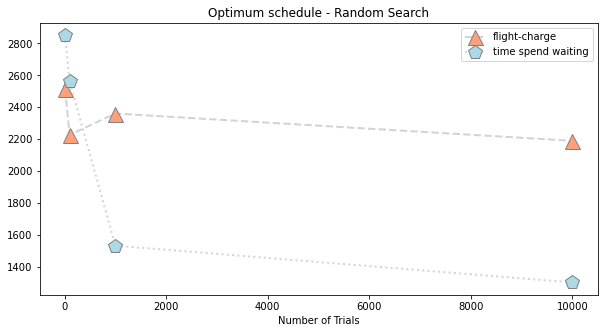

In [29]:
plt.figure(figsize=(10,5))
plt.plot(numTrials,results['fare'],'--^',markersize=15,color='lightgray' ,linewidth=2,markerfacecolor='lightsalmon',markeredgecolor='gray',label='flight-charge')
plt.plot(numTrials,results['wait'],':p',markersize=15,color='lightgrey' ,linewidth=2,markerfacecolor='lightblue',markeredgecolor='gray',label='time spend waiting')
plt.legend()
plt.title('Optimum schedule - Random Search')
plt.xlabel('Number of Trials')
plt.show()

# Hill Climbing Algorithm

In [30]:
def one_step_neighbour(num, leftbound=0, rightbound=9, flag=True):
    if leftbound<num and num<rightbound:
        a = num -1
        b = num +1
        if flag:
            return a
        return b
    if num == leftbound:
        return num+1
    return num-1

In [31]:
one_step_neighbour(1, flag=True),one_step_neighbour(1, flag=False),one_step_neighbour(0),one_step_neighbour(9)

(0, 2, 1, 8)

In [32]:
def hill_climbing(schedule, toPrint=False):

    num_iteration=0
    optimum_schedule = []
    
    while True:
        num_iteration+=1
        
        f,w,o=cost_function(schedule)
        initial_cost=f+w
        best_cost = initial_cost
        neighbours = []
        
        if toPrint:
            print('cost:',best_cost,'schedule:',schedule)

        # create a list of all neignbours which are 1 step away 
        for i in range(len(schedule)):
            
            option = schedule[i]
            
            a,b=option
            a_1 = one_step_neighbour(a, flag=True)  
            a_2 = one_step_neighbour(a, flag=False)
            b_1 = one_step_neighbour(b, flag=True)    
            b_2 = one_step_neighbour(b, flag=False)
            neighbours.append(schedule[0:i]+[(a_1,b_1)]+schedule[i+1:])
            neighbours.append(schedule[0:i]+[(a_2,b_2)]+schedule[i+1:])

        # algorithm looks at all neighbours(1-step-away) and move to a state that improves the costfunction
        for option in neighbours:
            f,w,o = cost_function(option)
            if f+w < best_cost:
                best_cost = f+w
                optimum_schedule=option[:]
                
        if best_cost == initial_cost:
            break
        else:
            schedule = optimum_schedule[:]
    
    if toPrint:
            print('Number of iteration:',num_iteration,' optimum solution found:',optimum_schedule)
    
    return optimum_schedule           
                      

In [125]:
best_schedule_by_Hill_climbing = hill_climbing(generate_schedule(), toPrint=True)

cost: 6146 schedule: [(4, 2), (3, 1), (9, 4), (4, 4), (3, 5), (7, 6)]
cost: 5525 schedule: [(4, 2), (4, 2), (9, 4), (4, 4), (3, 5), (7, 6)]
cost: 5259 schedule: [(4, 2), (4, 2), (8, 3), (4, 4), (3, 5), (7, 6)]
cost: 4891 schedule: [(4, 2), (4, 2), (7, 2), (4, 4), (3, 5), (7, 6)]
cost: 4706 schedule: [(4, 2), (5, 3), (7, 2), (4, 4), (3, 5), (7, 6)]
cost: 4545 schedule: [(4, 2), (5, 3), (7, 2), (4, 4), (3, 5), (6, 5)]
cost: 4173 schedule: [(4, 2), (5, 3), (6, 1), (4, 4), (3, 5), (6, 5)]
Number of iteration: 7  optimum solution found: [(4, 2), (5, 3), (6, 1), (4, 4), (3, 5), (6, 5)]


In [126]:
f,w,o = cost_function(best_schedule_by_Hill_climbing,toPrint=True)

*************************************************************************************************

Schedule [(4, 2), (5, 3), (6, 1), (4, 4), (3, 5), (6, 5)]
Total flight charge for going to Rome 1255 $
Total flight charge for returning from Rome 1101 $
Net flight charge for the journey 2356 $
Total time spend waiting at airport on arrival at Rome 723 minutes, 	 12hr:3minutes
Total time spend waiting at airport on departure at Rome 1094 minutes, 	 18hr:14minutes
Net time spend waiting 1817 minutes, 	 30hr:17minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes) Waiting(hr:mm)
0     12:18   14:56   172                195  3hr:15minutes
1     14:22   16:32   126                 99  1hr:39minutes
2     15:34   18:11   326                  0   0hr:0minutes
3     12:34   15:02   109                189   3hr:9minutes
4     10:30   14:57   290                194  3hr:14minutes
5     15:23   17:25   232                 46  0hr:46minutes

Travelling from Rome
  Departure Arriv

# Simulated Annealing

In [35]:
def random_index(num):
    neighbours = list(range(num))
    choice = random.choice(neighbours)
    return choice

In [36]:
# eg: get a random index
schedule = [(3, 8), (4, 4), (3, 4), (2, 1), (6, 8), (6, 0)]
random_index(len(schedule))

5

In [37]:
def make_correction(choice):
    if choice < 0:
        return 1
    elif choice > 9:
        return 8
    else:
        return choice


def random_option(option):
    a,b=option
    if a>0 and a<9 and b>0 and b<9:
        return random.choice([(a+1,b), (a-1,b), (a,b+1), (a,b-1)])
    
    choice = random.choice([(a+1,b), (a-1,b), (a,b+1), (a,b-1)])
    a,b = choice
    
    a = make_correction(a)
    b = make_correction(b)
    
    return (a,b)
    
def get_random_neighbour(schedule):
    index = random_index(len(schedule))
    option = schedule[index]
    neighbour_option = random_option(option)
    schedule[index]=neighbour_option
    return schedule
    
    

In [38]:
# eg: pick a random neighbour

schedule = [(3, 8), (4, 4), (3, 4), (2, 1), (6, 8), (6, 0)]

get_random_neighbour(schedule)

[(3, 8), (4, 4), (3, 4), (1, 1), (6, 8), (6, 0)]

In [39]:
def simulatedAnnealing(schedule, temperature=10000, cooling=0.99, toPrint=False):
    f,w,o = cost_function(schedule)
    # set the initial values
    best_cost = f+w 
    itearation = 0
    bad_moves = 0
    good_moves = 0
    best_schedule = schedule[:]
    
    while temperature>0.1:
        itearation+=1
        # pick a random neighbour
        neighbour = get_random_neighbour(schedule)

        # we move to the new neighbour state only if it improves the cost function
        # if the neighbour is not improving the cost function, with some probablity we still move into the state 
        f,w,o = cost_function(neighbour)
        cost = f+w
        

        if best_cost > cost:
            best_cost = cost
            schedule = neighbour[:]
            best_schedule = neighbour[:]
            good_moves+=1
            
        else:
            delta = cost - best_cost
            probability = pow(math.e,-delta/temperature)

            if random.random()<probability:
                schedule = neighbour[:]
                bad_moves+=1

            
        temperature = temperature*cooling
    
    # best schedule found
    if toPrint:
        print('best',best_schedule,'found after',itearation,'iterations \n number of bad moves made is',bad_moves,'\n number of good moves',good_moves)
    
    return best_schedule


In [97]:
best_schedule_by_SimulatedAnnealing = simulatedAnnealing(generate_schedule(), temperature=10000, cooling=0.99, toPrint=True)

best [(5, 4), (6, 5), (7, 5), (8, 5), (5, 2), (8, 2)] found after 1146 iterations 
 number of bad moves made is 195 
 number of good moves 19


In [98]:
f,w,o=cost_function(best_schedule_by_SimulatedAnnealing, True)

*************************************************************************************************

Schedule [(5, 4), (6, 5), (7, 5), (8, 5), (5, 2), (8, 2)]
Total flight charge for going to Rome 1348 $
Total flight charge for returning from Rome 1208 $
Net flight charge for the journey 2556 $
Total time spend waiting at airport on arrival at Rome 650 minutes, 	 10hr:50minutes
Total time spend waiting at airport on departure at Rome 930 minutes, 	 15hr:30minutes
Net time spend waiting 1580 minutes, 	 26hr:20minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes) Waiting(hr:mm)
0     13:37   15:08   250                320  5hr:20minutes
1     15:58   18:40   173                108  1hr:48minutes
2     17:07   20:04   291                 24  0hr:24minutes
3     18:34   19:36   136                 52  0hr:52minutes
4     13:54   18:02   294                146  2hr:26minutes
5     18:35   20:28   204                  0   0hr:0minutes

Travelling from Rome
  Departure Arriv

# Genetic Algorithm

In [42]:
def get_random_index(schdeule):
    genes = list(range(len(schedule)))
    index = random.choice(genes)
    return index

In [43]:
def mutation(schedule):
    
    index = get_random_index(schedule)
    
    option = schedule[index]
    a,b = option 
    
    a = random.choice(list(range(10)))
    b = random.choice(list(range(10)))
    
    return schedule[0:index]+[(a,b)]+schedule[index+1:]

In [44]:
# eg: mutation

schedule = [(7, 6), (5, 4), (7, 4), (8, 2), (6, 2), (7, 3)]
mutation(schedule)

[(7, 6), (5, 4), (7, 4), (8, 2), (6, 4), (7, 3)]

In [45]:
def crossover(A, B):
    index = get_random_index(A)
    return A[:index]+B[index:]

In [46]:
# eg crossover
A = [(7, 6), (5, 4), (7, 4), (8, 2), (6, 2), (7, 3)]
B = [(3, 8), (4, 4), (3, 4), (2, 1), (6, 8), (6, 0)]

crossover(A,B)

[(7, 6), (5, 4), (7, 4), (8, 2), (6, 2), (6, 0)]

In [47]:
def random_selection(num):
    population = []
    for i in range(num):
        population.append(generate_schedule())
    return population

In [48]:
# eg: random selection
random_selection(5)

[[(5, 8), (0, 9), (3, 5), (0, 2), (7, 2), (5, 0)],
 [(3, 6), (0, 0), (2, 5), (9, 5), (2, 2), (7, 6)],
 [(5, 6), (9, 2), (0, 9), (2, 4), (8, 1), (2, 3)],
 [(6, 4), (8, 3), (4, 3), (9, 8), (6, 2), (7, 9)],
 [(5, 1), (7, 4), (7, 8), (2, 9), (9, 4), (2, 3)]]

In [49]:
def get_cost_util(schdeule):
    f,w,o = cost_function(schdeule)
    return f+w

In [50]:
def geneticAlgorithm(population_size, pass_percentage=0.5 ,generations=20, mutation_prob=0.5):

    # get a random population
    population = random_selection(population_size)

    while generations>0:
        fit_pop=[]
        
        # apply fitness function
        # sort the population in ascending
        sorted_pop = sorted(population, key=lambda x:get_cost_util(x))


        # pass the toppers to the next gen
        pass_over = population_size*pass_percentage
        pass_over_size = math.floor(pass_over)
        fit_pop = sorted_pop[:pass_over_size]

        iterations = population_size - pass_over_size
        for i in range(iterations):

            # crossover
            schedule_1 = sorted_pop[random.choice(list(range(population_size)))]
            schedule_2 = sorted_pop[random.choice(list(range(population_size)))]

            cross = crossover(schedule_1, schedule_2)

            if random.random()<mutation_prob:
                cross = mutation(cross)

            fit_pop.append(cross)

        population = fit_pop[:]
        generations-=1

        
    

    return population
    
    

    

In [79]:
best_schedule_by_GeneticAlgorithm = geneticAlgorithm(10)
best_schedule_by_GeneticAlgorithm

[[(3, 3), (4, 4), (3, 6), (3, 3), (4, 3), (4, 3)],
 [(3, 3), (4, 4), (3, 6), (5, 6), (4, 3), (4, 3)],
 [(3, 3), (4, 4), (3, 6), (2, 3), (2, 2), (4, 3)],
 [(3, 3), (4, 4), (2, 5), (2, 2), (0, 2), (4, 3)],
 [(3, 3), (4, 4), (2, 5), (2, 3), (2, 2), (4, 3)],
 [(3, 3), (4, 4), (2, 5), (4, 2), (2, 2), (4, 3)],
 [(3, 3), (4, 4), (2, 5), (2, 3), (2, 2), (3, 3)],
 [(7, 4), (4, 4), (2, 5), (2, 2), (0, 2), (4, 3)],
 [(3, 3), (4, 4), (2, 5), (2, 3), (2, 2), (4, 3)],
 [(3, 3), (4, 4), (2, 5), (2, 2), (0, 2), (4, 3)]]

In [80]:
f,w,o = cost_function(best_schedule_by_GeneticAlgorithm[0],True)

*************************************************************************************************

Schedule [(3, 3), (4, 4), (3, 6), (3, 3), (4, 3), (4, 3)]
Total flight charge for going to Rome 1131 $
Total flight charge for returning from Rome 1021 $
Net flight charge for the journey 2152 $
Total time spend waiting at airport on arrival at Rome 393 minutes, 	 6hr:33minutes
Total time spend waiting at airport on departure at Rome 442 minutes, 	 7hr:22minutes
Net time spend waiting 835 minutes, 	 13hr:55minutes 

Travelling to Rome
  Departure Arrival  Cost  Waiting (minutes) Waiting(hr:mm)
0     11:08   13:07   175                138  2hr:18minutes
1     12:44   14:17   134                 68   1hr:8minutes
2     11:28   14:40   248                 45  0hr:45minutes
3     11:16   13:29    83                116  1hr:56minutes
4     12:19   15:25   342                  0   0hr:0minutes
5     12:08   14:59   149                 26  0hr:26minutes

Travelling from Rome
  Departure Arrival 